<a href="https://colab.research.google.com/github/juansevecchi9/Pistachio-quality-project/blob/main/Pistachio_type_predictor_(classification_template).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# To use data stored in Drive.

from google.colab import drive   
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read dataset

df = pd.read_csv('/content/drive/MyDrive/ion.csv')
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,good
347,348,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,good
348,349,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,good
349,350,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,good


In [3]:
# Convert data to an array

dataset = df.values
dataset

array([[1, 1, 0, ..., 0.18641, -0.453, 'good'],
       [2, 1, 0, ..., -0.13738, -0.02447, 'bad'],
       [3, 1, 0, ..., 0.56045, -0.38238, 'good'],
       ...,
       [349, 1, 0, ..., 0.92697, -0.00577, 'good'],
       [350, 1, 0, ..., 0.87403, -0.16243, 'good'],
       [351, 1, 0, ..., 0.85764, -0.06151, 'good']], dtype=object)

In [4]:
# Dividing between input data and output data

X = dataset[:, 1:35] 
print(X)
Y = dataset[:, 35]
print(Y)

[[1 0 0.99539 ... -0.54487 0.18641 -0.453]
 [1 0 1.0 ... -0.06288 -0.13738 -0.02447]
 [1 0 1.0 ... -0.2418 0.56045 -0.38238]
 ...
 [1 0 0.94701 ... 0.00442 0.92697 -0.00577]
 [1 0 0.90608 ... -0.03757 0.87403 -0.16243]
 [1 0 0.8471 ... -0.06678 0.85764 -0.06151]]
['good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'go

In [5]:
# Transform 'good' quality to '1', 'bad' quality to 0.

from sklearn.preprocessing import LabelEncoder 

LE = LabelEncoder()
Y = LE.fit_transform(Y)

print(Y)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
# Scale data between 0 and 1

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.      , 0.      , 0.997695, ..., 0.227565, 0.593205, 0.2735  ],
       [1.      , 0.      , 1.      , ..., 0.46856 , 0.43131 , 0.487765],
       [1.      , 0.      , 1.      , ..., 0.3791  , 0.780225, 0.30881 ],
       ...,
       [1.      , 0.      , 0.973505, ..., 0.50221 , 0.963485, 0.497115],
       [1.      , 0.      , 0.95304 , ..., 0.481215, 0.937015, 0.418785],
       [1.      , 0.      , 0.92355 , ..., 0.46661 , 0.92882 , 0.469245]])

In [26]:
# Create train, validation and test data

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(280, 34) (35, 34) (36, 34) (280,) (35,) (36,)


In [27]:
# 3-layer model

model = Sequential([
    Dense(64, activation='relu', input_shape=(34,)),
    
    Dense(64, activation='relu'),
    
    Dense(1, activation='sigmoid'),
])

In [28]:
# Model compilation

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
# Model training

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 0.7536 - accuracy: 0.3500 - val_loss: 0.6854 - val_accuracy: 0.6286
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6714 - val_loss: 0.6460 - val_accuracy: 0.6571
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.6214 - val_loss: 0.6288 - val_accuracy: 0.6571
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.6500 - val_loss: 0.6185 - val_accuracy: 0.6571
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6175 - accuracy: 0.6464 - val_loss: 0.6135 - val_accuracy: 0.6571
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.6500 - val_loss: 0.6103 - val_accuracy: 0.6286
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6085 - accuracy: 0.6464 - val_loss: 0.6077 - val_accuracy: 0.6286
Epoch 8/100
9/9 [=========

In [30]:
# Model evaluation

model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 6ms/step - loss: 0.3959 - accuracy: 0.8333


0.8333333134651184

In [31]:
# Prediction


print(Y_test[4])
l = model.predict(X_test)[4]

if l[0] > 0.7:
  print("Buena calidad")


1
Buena calidad


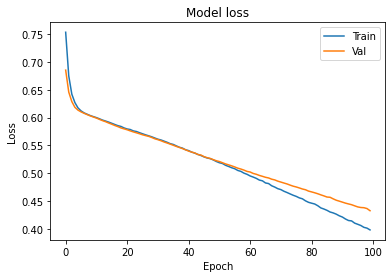

In [32]:
# Loss chart

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

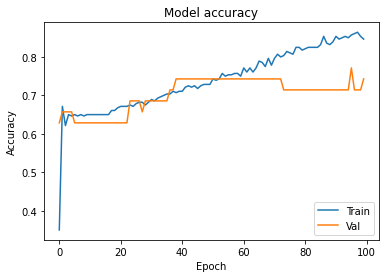

In [33]:
# Accuracy chart

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:

# New model using regularizers

from keras import regularizers
model_2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(34,)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])



In [35]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
9/9 [==============================] - 4s 121ms/step - loss: 4.8164 - accuracy: 0.5750 - val_loss: 4.4685 - val_accuracy: 0.6286
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 4.2463 - accuracy: 0.6464 - val_loss: 3.9579 - val_accuracy: 0.6286
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 3.7682 - accuracy: 0.6464 - val_loss: 3.5010 - val_accuracy: 0.6286
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 3.3276 - accuracy: 0.6500 - val_loss: 3.0995 - val_accuracy: 0.6286
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 2.9645 - accuracy: 0.6536 - val_loss: 2.7462 - val_accuracy: 0.6286
Epoch 6/200
9/9 [==============================] - 0s 14ms/step - loss: 2.6317 - accuracy: 0.6464 - val_loss: 2.4409 - val_accuracy: 0.6286
Epoch 7/200
9/9 [==============================] - 0s 14ms/step - loss: 2.3279 - accuracy: 0.6571 - val_loss: 2.1772 - val_accuracy: 0.6571
Epoch 8/200
9/9 [==

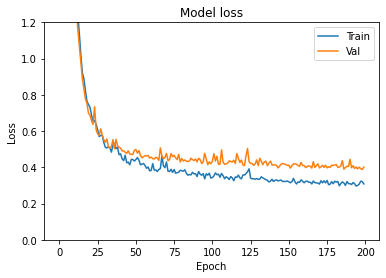

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

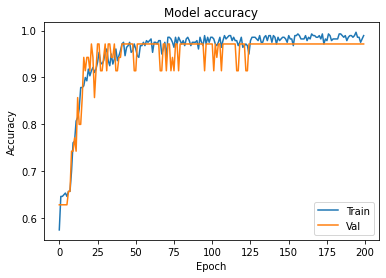

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()